In [1]:
import pandas as pd
import sklearn as sk
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # almost the same as LogReg
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [2]:
df = pd.read_csv("classify_1D.csv")

FileNotFoundError: [Errno 2] File b'classify_1D.csv' does not exist: b'classify_1D.csv'

In [ ]:
df.head()

In [ ]:
df.plot(kind="scatter", x="X_train", y="Y_train")

## Trees 

Let $X = (X_1, X_2, \ldots, X_m), \ Y = (Y_1, Y_2, \ldots, Y_m) \in \mathbb{R}^m$ for some $m \in \mathbb{N}$ and assume that $Y_i \in \{0, 1\}$ for all $i \in \{0, 1, \ldots , m\}$. Our decision tree is going to be very simple, first choose a split point $t$ that divides $\mathbb{R}$ into $A_1 = (-\infty, t]$, $A_2 = \mathbb{R}\setminus A_1$.  <br>
Let $\widehat{p}_i(j)$ be the proportion of observations in $A_i$ such that $Y_k=j$, that is
$$ \widehat{p}_i(j) = \frac{\sum_{k=1}^m \mathbf{1}_{\{Y_k = j, X_k \in A_i\}}}{\sum_{k=1}^m \mathbf{1}_{\{X_k \in A_i\}}}$$
for $i =1, 2$ and $j=0,1$.
The __impurity__ of the split $t$ is defined to be 
$$ I(t) = \gamma(1) + \gamma(2) = \sum_{k=1}^2 \gamma(k),$$
where 
$$ \gamma(i) = 1 - \left(\widehat{p}_i(0)\right)^2 - \left(\widehat{p}_i(1)\right)^2 = 1 - \sum_{j=0}^1 \left(\widehat{p}_i(j)\right)^2 .$$
This particular measure of impurity is know as the __Gini index__. <br>
if $A_i$ contains all $0$'s or all $1$'s, then $\gamma(i) = 0$, otherwise $\gamma(i)>0$.
In oue algorithm we pick 
$$t = \mbox{argmin}_I \  I(t).$$ <br>
If there are several data columns $X_1, X_2,\ldots, X_n$, we choose whichever of them and split that leads to the lowest impurity. This process continues until some stopping criterion is met. An example of a stopping criterion is, when every partition element has fewer than $M$ data points, for some fixed $M \in \mathbb{N}$. The bottom nodes of the tree are called the __leaves__. Each leaf is assigned a $0$ or $1$ depending on whether there are more data points with $Y=0$ or $Y=1$ in that partition element. <br>

#### Warning 
Overfitting will occur if your tree is designed so as to perfectly fit all samples in the training data set.

## Defining $\widehat{p}_i(j)$

In [ ]:
def p(j, X, Y, Interval):
    t1 = Interval[0]
    t2 =  Interval[1]
    n = X.size
    num = Y[(X>t1) & (X<=t2)][Y==j]
    denom = X[(X>t1) & (X<=t2)]
    if denom.size==0:
        return 100
    return num.size/denom.size
    

## Defining Impurity measure

In [8]:
def gammaI(s, X, Y, Ts):
    return 1-(p(0, X, Y, Ts[s])**2+p(1, X, Y, Ts[s])**2)

In [9]:
def total_impurity(X, Y, Ts):
    total = gammaI(0, X, Y, Ts)+gammaI(1, X, Y, Ts)
    return total 

## Prep. data

In [10]:
X_train = df["X_train"]
Y_train = df["Y_train"]
X_test =  df["X_test"]

In [11]:
X_max = int(X_train.max())
X_min = int(X_train.min())

In [12]:
Bigconst = 10
Infty = max(X_max, abs(X_min))+Bigconst
dt = 0.00001
N = 1000
time = np.linspace(X_min, X_max, N)
record = np.zeros(N)
for k, t in enumerate(time):
    Ts = [[-Infty, t], [t+dt, Infty]]
    record[k] = total_impurity(X_train, Y_train, Ts)

our_index_t = np.argmin(record)
t_min_imp = time[our_index_t]
print(t_min_imp)

-0.6756756756756754


In [13]:
def train(t):
    Condition = (X_train>t) & (X_train<Infty)
    modeY = Y_train[Condition].mode()
    notmode = np.where(modeY>0, 0, 1)
    Y = np.where(X_test>t, modeY, notmode)
    return Y

In [14]:
Y_test = train(t_min_imp)

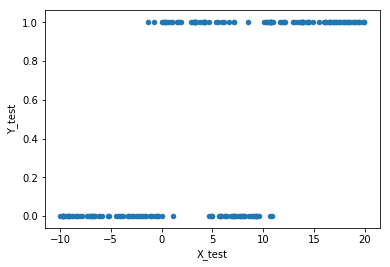

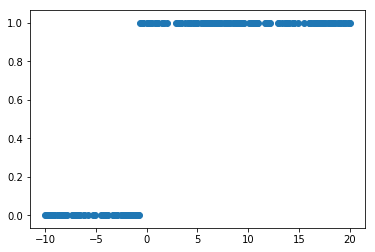

In [15]:
df.plot(kind="scatter", x="X_test", y="Y_test")
plt.show()
plt.scatter(X_test, Y_test)
plt.show()

## Our prediction Score

In [16]:
df.Y_test[df.Y_test==Y_test].size/df.Y_test.size

0.78

## Sklearn in-built decision tree, logistic Regression, KNN and Random Forest

In [17]:
X_train = df["X_train"]
Y_train = df["Y_train"]
X_test  = df["X_test"]

In [18]:
def prediction_score(mod):
    X = X_train.values.reshape(-1,1)
    mod.fit(X, Y_train)
    X_t = X_test.values.reshape(-1,1)
    new_Y = mod.predict(X_t)
    return df.Y_test[df.Y_test==new_Y].size/df.Y_test.size, new_Y

In [33]:
DT = tree.DecisionTreeClassifier()
logReg = LogisticRegression( solver='lbfgs')
LDA = LinearDiscriminantAnalysis()
KNN = KNeighborsClassifier(n_neighbors=2)
RF = RandomForestClassifier(n_estimators=100)
BNB = BernoulliNB()
GNB = GaussianNB()
NN = MLPClassifier(solver='lbfgs')
print(prediction_score(DT)[0])
#print(prediction_score(KNN)[0])
print(prediction_score(RF)[0])
#print(prediction_score(logReg)[0], prediction_score(LDA)[0]) 
#print(prediction_score(BNB)[0], prediction_score(GNB)[0])
#print(prediction_score(NN)[0])


0.845
0.845


In [20]:
score, new_Y = prediction_score(NN)

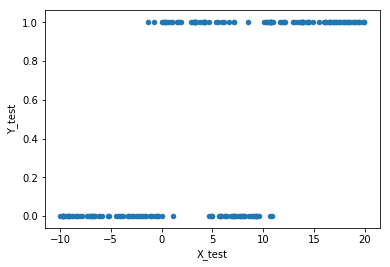

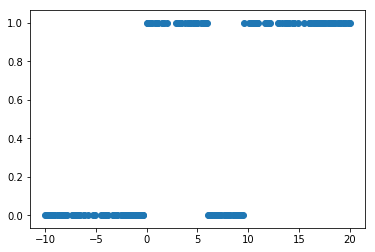

In [21]:
df.plot(kind="scatter", x="X_test", y="Y_test")
plt.show()
plt.scatter(X_test, new_Y)
plt.show()